<a href="https://colab.research.google.com/github/xmcodings/2020_cau_oss_hackathon/blob/master/hackathon_template_2020_Team7_Edit(jw)_89590.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **0. 해커톤 진행 주의사항**

**1)  개발 관련 주의사항**
*   [1. 초기 환경 설정]은 절대 수정하지 말 것
*   모든 구현은 [2. 데이터 전처리] 및 [3.모델 생성]에서만 진행
*   [4. 모델 저장]에서 team_name 변수 변경 (예.`team_name = 'team01'`)
 *    트레이닝 중간에 checkpoint를 활용하여 모델을 저장한 경우에도 파일 이름 양식 통일 필수
*   Colab 사용중 실수로 데이터 손실이 발생할 수도 있으니 중간 결과값을 github에 업로드 
 *    "런타임->모든 런타임 재설정"은 절대 누르지 말 것 (저장한 모델 데이터가 모두 삭제됨)
*   효율적인 구현 및 테스팅을 위해 GPU 가속 기능 활성화
 *    "런타임 -> 런타임 유형변경 -> 하드웨어 가속기 -> GPU 설정"
*   주석을 최대한 자세히 작성
*   Keras API 관련하여 [Keras Documentation](https://keras.io/) 참조

**2) 제출 관련 주의사항**
*  제출물
 *  소스코드 (hackathon_teamXX.ipynb)
 *  컴파일된 모델 파일 (model_entire_teamXX.h5)
 *  모델 발표 자료 
* 제출 기한: **오후 5시 (단, 발표자료는 11시)**
* 제출 방법: [GitHub README](https://github.com/cauosshackathonta/2020_cau_oss_hackathon/) 참조

 
**3) 평가 관련 주의사항**
*  모델 성능 = 테스트 데이터 셋 분류 정확도
 *  model.evaluate(x_test, y_test)
*  제출된 모델들의 테스트 데이터 셋 분류 정확도를 기준으로 수상작 결정
*  수상 후보들에 대해서는 소스코드를 기반으로 모델 재검증 
 
**4) 수상 실격 사유**
*  유사한 소스코드 or 알고리즘이 적발될 경우
*  소스코드와 제출된 모델이 상이한 경우
*  개발 관련 주의사항을 지키지 않은 경우
 *  예: [초기 환경 설정]을 수정한 경우
*  데이터 셋을 변조한 경우
 *  예. 테스트 데이터 셋을 트레이닝 데이터 셋에 포함하여 모델 생성 
*  주석이 소스코드와 맞지 않거나 미비할 경우






# **1. 초기 환경 설정**



In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals, unicode_literals

# tensorflow와 tf.keras 및 관련 라이브러리 임포트
import tensorflow as tf
from tensorflow import keras
from keras.utils import np_utils

import numpy as np

# 데이터셋 다운로드
check = !if [ -d 'dataset/' ]; then echo "1" ; else echo "0"; fi
if (check[0] is '0' ):
  !mkdir dataset
  !wget 'https://www.itl.nist.gov/iaui/vip/cs_links/EMNIST/matlab.zip'
  !unzip matlab.zip -d /content/dataset

# 데이터셋 로드
from scipy import io as spio
emnist = spio.loadmat("/content/dataset/matlab/emnist-balanced.mat")

x_train = emnist["dataset"][0][0][0][0][0][0]
y_train = emnist["dataset"][0][0][0][0][0][1]

x_test = emnist["dataset"][0][0][1][0][0][0]
y_test = emnist["dataset"][0][0][1][0][0][1]

# # 분류를 위해 클래스 벡터를 바이너리 매트릭스로 변환
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)

# 데이터 28x28 이미지화
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')

# 총 클래스 개수
num_classes = y_test.shape[1]
input_shape = x_test.shape[1:]

--2020-08-29 04:17:21--  https://www.itl.nist.gov/iaui/vip/cs_links/EMNIST/matlab.zip
Resolving www.itl.nist.gov (www.itl.nist.gov)... 132.163.4.36, 2610:20:6b01:4::36
Connecting to www.itl.nist.gov (www.itl.nist.gov)|132.163.4.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 743900280 (709M) [application/zip]
Saving to: ‘matlab.zip’

matlab.zip          100%[===================>] 709.44M  85.0MB/s    in 8.1s    

2020-08-29 04:17:29 (87.5 MB/s) - ‘matlab.zip’ saved [743900280/743900280]

Archive:  matlab.zip
  inflating: /content/dataset/matlab/emnist-balanced.mat  
  inflating: /content/dataset/matlab/emnist-byclass.mat  
  inflating: /content/dataset/matlab/emnist-bymerge.mat  
  inflating: /content/dataset/matlab/emnist-digits.mat  
  inflating: /content/dataset/matlab/emnist-letters.mat  
  inflating: /content/dataset/matlab/emnist-mnist.mat  


# 사진 확인


In [89]:
print(x_train.shape)
print(x_test.shape)


(112800, 28, 28, 1)
(18800, 28, 28, 1)


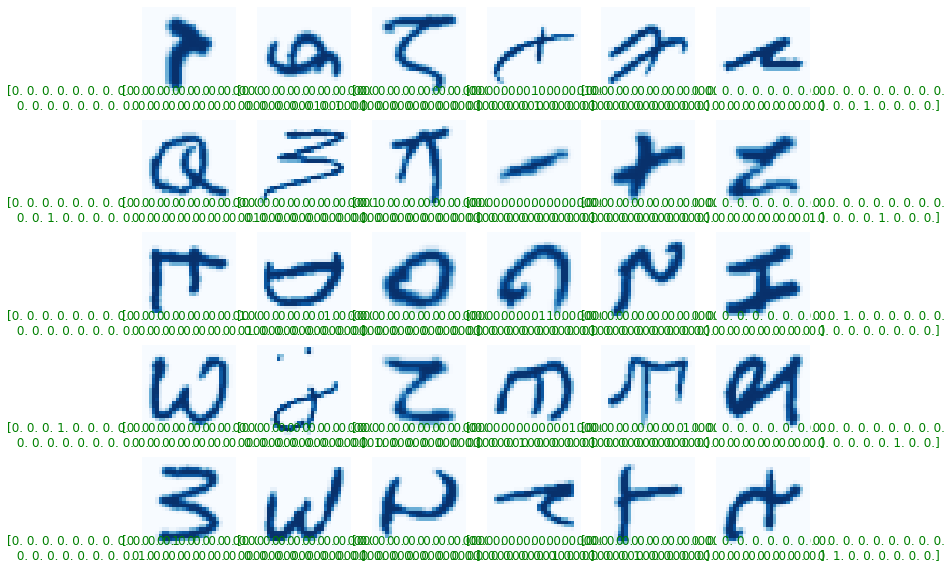

In [6]:
import matplotlib.pyplot as plt 
import cv2 as cv

label = []

rows = 5 # defining no. of rows in figure
cols = 6 # defining no. of colums in figure

f = plt.figure(figsize=(2*cols,2*rows)) # defining a figure 

for i in range(rows*cols): 
    f.add_subplot(rows,cols,i+1) # adding sub plot to figure on each iteration
    plt.imshow(x_train[i].reshape([28,28]),cmap="Blues") 
    plt.axis("off")
    plt.title(str(y_train[i]), y=-0.15,color="green")


# **2. 데이터 전처리**



In [245]:
from skimage import filters
from skimage import exposure
from skimage.util import random_noise


import random 



# 데이터 전처리 (예: normalization)
x_train_after = x_train / 255.0
x_test_after = x_test / 255.0

# augmentation



#2. tighten image contrast

#v_min, v_max = np.percentile(x_train_after[5], (0.2, 98.8)) # 기준을 5번째 사진으로

#x_train_after = exposure.rescale_intensity(x_train_after, in_range=(v_min, v_max))
#x_test_after = exposure.rescale_intensity(x_test_after, in_range=(v_min, v_max))

#3. flip random data

# horizontal
augment_num = 0

aug_record = []
for i in tqdm(range(augment_num)):
  rand = random.randint(0, 112799)
  x_train_after[rand] = x_train_after[rand][::-1, :]
  aug_record.append(rand)

print("horizontal aug record: ", aug_record)

print("     ")

# vertical

aug_record = []

for i in tqdm(range(augment_num)):
  rand = random.randint(0, 112799)
  x_train_after[rand] = x_train_after[rand][:, ::-1]
  aug_record.append(rand)

print("vertical aug record: ", aug_record)
# 4. random noise

x_train_after = random_noise(x_train_after)
x_test_after = random_noise(x_test_after)

#1. sigmoid correction
x_train_after = exposure.adjust_sigmoid(x_train_after)
x_test_after = exposure.adjust_sigmoid(x_test_after)



0it [00:00, ?it/s]

0it [00:00, ?it/s]


horizontal aug record:  []
     
vertical aug record:  []


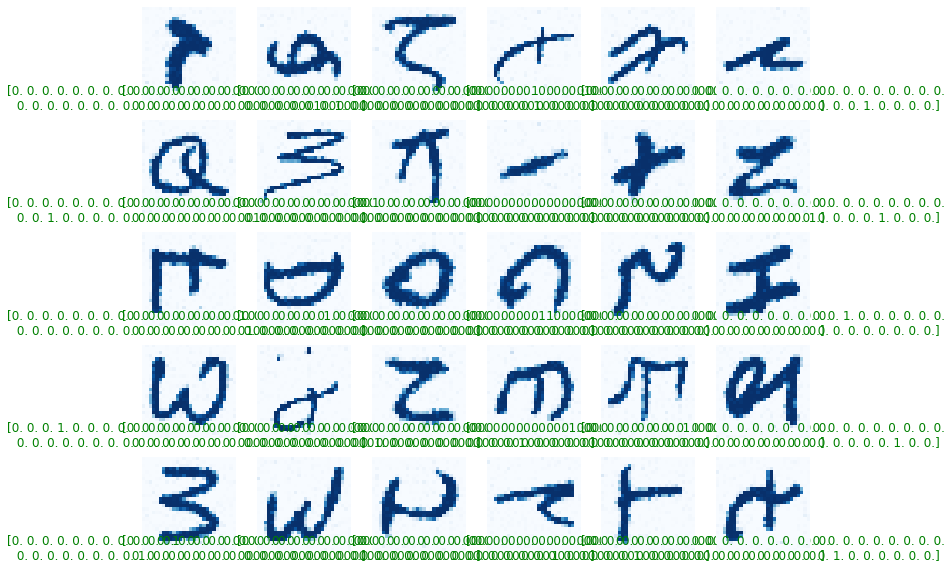

In [246]:
rows = 5 # defining no. of rows in figure
cols = 6 # defining no. of colums in figure

f = plt.figure(figsize=(2*cols,2*rows)) # defining a figure 

for i in range(rows*cols): 
    f.add_subplot(rows,cols,i+1) # adding sub plot to figure on each iteration
    plt.imshow(x_train_after[i].reshape([28,28]),cmap="Blues") 
    plt.axis("off")
    plt.title(str(y_train[i]), y=-0.15,color="green")

In [247]:
# maybe this might work....
'''
from skimage import filters
from tqdm import tqdm


out = np.empty((112800, 28, 28, 1))
for img in tqdm(x_train):
  camera = img
  val = filters.threshold_otsu(camera)
  mask = camera < val
  s = mask.flatten().reshape(28,28,1)
  out[:] = s

print(out)
'''

'\nfrom skimage import filters\nfrom tqdm import tqdm\n\n\nout = np.empty((112800, 28, 28, 1))\nfor img in tqdm(x_train):\n  camera = img\n  val = filters.threshold_otsu(camera)\n  mask = camera < val\n  s = mask.flatten().reshape(28,28,1)\n  out[:] = s\n\nprint(out)\n'

# **3. 모델 생성**

In [248]:
def make_model():

  model = keras.models.Sequential([
                      keras.layers.Conv2D(32, (5,5), padding  ="same", activation = 'relu', input_shape = (28, 28, 1)),  # layer 1
                      keras.layers.MaxPool2D((2,2)),                                                  # layer 2
                      keras.layers.Dropout(0.3),
                      keras.layers.Conv2D(64, (5,5), padding  ="same", activation = 'relu'),                            # layer 4
                      keras.layers.MaxPool2D((2,2)),                                                  # layer 5
                      keras.layers.Dropout(0.25),
                      keras.layers.Flatten(),
                      keras.layers.Dense(512, activation='relu'),
                      keras.layers.Dropout(0.4),
                      keras.layers.Dense(256, activation='relu'),
                      keras.layers.Dense(128, activation='relu'),
                      keras.layers.Dense(47, activation = 'softmax')]) # output layer
  return model

In [249]:
min_lr = 0.00000001
def scheduler(epoch, lr):
  
  if epoch < 3:
    return lr
  if lr < min_lr:
    return lr
  else:
    newlr = lr * tf.math.exp(-0.1)
    
    print("reducing lr to ", newlr)
    return newlr

In [250]:
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.callbacks import ReduceLROnPlateau

optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)

cnn_m = make_model()

#모델 compile

cnn_m.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

#모델 학습 및 callback

lr_schedule = tf.keras.callbacks.LearningRateScheduler(scheduler)
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath='/content/checkpoint_jinwon_best.h5', monitor='val_accuracy', verbose=1, save_weight_only=False, save_best_only=True, mode='auto')
RLP = ReduceLROnPlateau(monitor='val_loss',patience=3,factor=0.2,min_lr=0.0000001)

cnn_m.fit(x_train_after, y_train, batch_size = 256, epochs = 50, shuffle=True, callbacks=[cp_callback, RLP], validation_data=(x_test_after, y_test))

Epoch 1/50
438/441 [============================>.] - ETA: 0s - loss: 1.0348 - accuracy: 0.6830
Epoch 00001: val_accuracy improved from -inf to 0.83819, saving model to /content/checkpoint_jinwon_best.h5
441/441 [==============================] - 5s 12ms/step - loss: 1.0316 - accuracy: 0.6839 - val_loss: 0.4696 - val_accuracy: 0.8382
Epoch 2/50
440/441 [============================>.] - ETA: 0s - loss: 0.4937 - accuracy: 0.8309
Epoch 00002: val_accuracy improved from 0.83819 to 0.85293, saving model to /content/checkpoint_jinwon_best.h5
441/441 [==============================] - 5s 12ms/step - loss: 0.4937 - accuracy: 0.8309 - val_loss: 0.4193 - val_accuracy: 0.8529
Epoch 3/50
439/441 [============================>.] - ETA: 0s - loss: 0.4247 - accuracy: 0.8500
Epoch 00003: val_accuracy improved from 0.85293 to 0.86282, saving model to /content/checkpoint_jinwon_best.h5
441/441 [==============================] - 5s 12ms/step - loss: 0.4247 - accuracy: 0.8500 - val_loss: 0.3902 - val_acc

# **4. 모델 저장**

In [255]:
save_path = '/content/'
team_name = 'team07'

# 트레이닝된 전체 모델을 저장합니다.
cnn_m.save(save_path +  'model_entire_'+ team_name + '.h5')

bestm = keras.models.load_model(save_path + "checkpoint_jinwon_best"+ '.h5')
bestm.save(save_path +  'model_entire_'+ team_name + '.h5')


# **5. 모델 로드 및 평가**

In [256]:
save_path = '/content/'
team_name = 'team07'

model = keras.models.load_model(save_path + 'model_entire_' + team_name + '.h5')


model.evaluate(x_test_after, y_test)

588/588 [==============================] - 2s 3ms/step - loss: 0.2976 - accuracy: 0.8959


[0.2976222634315491, 0.8959042429924011]